In [165]:
# import essential libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn import svm

In [166]:
# read the data and check the first tuples
df = pd.read_csv('data.csv')

In [167]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849.0,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,NaN,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000.0,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583.0,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000.0,0.0,141.0,360.0,1.0,Urban,Y


In [168]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             599 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          613 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    612 non-null    float64
 7   CoapplicantIncome  613 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(5), object(8)
memory usage: 62.5+ KB


In [169]:
# find the amount of null values for each column
df.isnull().sum()

Loan_ID               0
Gender               15
Married               3
Dependents           15
Education             1
Self_Employed        32
ApplicantIncome       2
CoapplicantIncome     1
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
property_Area         0
Loan_Status           0
dtype: int64

<AxesSubplot: >

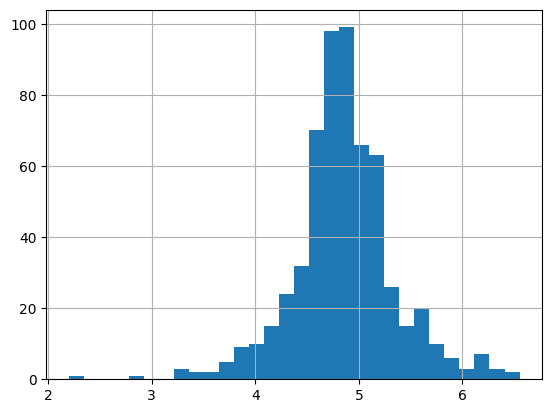

In [170]:
# a new column for displaying natural logarithms of Loan Amount
df['loanAmount_log'] = np.log(df['LoanAmount'])
df['loanAmount_log'].hist(bins=30)

In [171]:
df.isnull().sum()

Loan_ID               0
Gender               15
Married               3
Dependents           15
Education             1
Self_Employed        32
ApplicantIncome       2
CoapplicantIncome     1
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
property_Area         0
Loan_Status           0
loanAmount_log       22
dtype: int64

In [172]:
# fill in all the null values with the mode of that column to avoid errors
df['Gender'].fillna(df['Gender'].mode()[0], inplace = True)
df['Married'].fillna(df['Married'].mode()[0], inplace = True)
df['Dependents'].fillna(df['Dependents'].mode()[0], inplace = True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0], inplace = True)
df['Education'].fillna('Not Graduate', inplace = True)
df['ApplicantIncome'].fillna(df['ApplicantIncome'].mode()[0], inplace = True)
df['CoapplicantIncome'].fillna(df['CoapplicantIncome'].mode()[0], inplace = True)


In [173]:
# create a new column called "total income" which might be a handy resource
df['totalIncome'] = df['ApplicantIncome'] + df['CoapplicantIncome']

<AxesSubplot: >

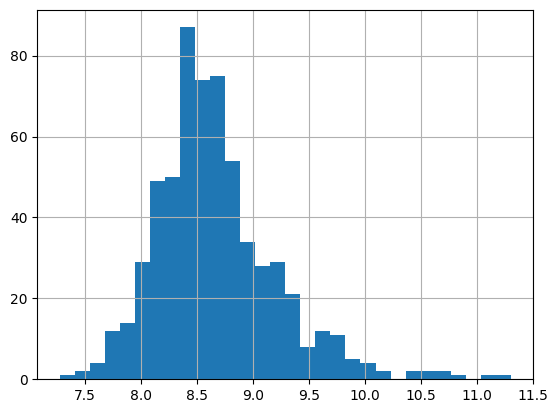

In [174]:
df['totalIncome_log'] = np.log(df['totalIncome'])
df['totalIncome_log'].hist(bins=30)

In [175]:
df.LoanAmount = df.LoanAmount.fillna(df.LoanAmount.mean())
df.loanAmount_log = df.LoanAmount.fillna(df.LoanAmount.mean())

In [176]:
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0], inplace = True)
df['Credit_History'].fillna(df['Credit_History'].mode()[0], inplace = True)

In [177]:
# now there are no missing values
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
property_Area        0
Loan_Status          0
loanAmount_log       0
totalIncome          0
totalIncome_log      0
dtype: int64

In [178]:
# rows and columns selected for training
x = df.iloc[:, np.r_[1:5,9:11,13:15]].values
y = df.iloc[:,12].values

In [179]:
x

array([['Male', 'No', '0', ..., 1.0, 146.41216216216216, 5849.0],
       ['Male', 'Yes', '1', ..., 1.0, 128.0, 4008.0],
       ['Male', 'Yes', '0', ..., 1.0, 66.0, 3000.0],
       ...,
       ['Male', 'Yes', '1', ..., 1.0, 253.0, 8312.0],
       ['Male', 'Yes', '2', ..., 1.0, 187.0, 7583.0],
       ['Female', 'No', '0', ..., 0.0, 133.0, 4583.0]], dtype=object)

In [180]:
y

array(['Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'Y',
       'N', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'N', 'Y', 'N', 'N', 'N', 'Y',
       'Y', 'Y', 'N', 'Y', 'N', 'N', 'N', 'Y', 'N', 'Y', 'N', 'Y', 'Y',
       'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y',
       'N', 'N', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'N',
       'N', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'N', 'N',
       'N', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y',
       'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'N', 'N', 'N', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'N', 'N', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'N',
       'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'N', 'Y', 'N', 'N

Loans taken by Gender:
Male      502
Female    112
Name: Gender, dtype: int64


<AxesSubplot: xlabel='Gender', ylabel='count'>

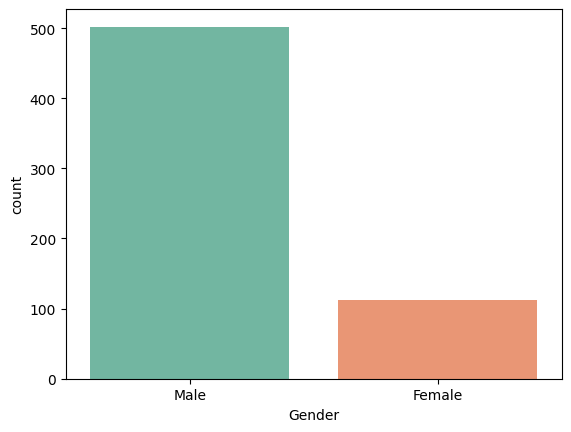

In [181]:
print("Loans taken by Gender:")
print(df['Gender'].value_counts())
sns.countplot(x='Gender', data=df, palette='Set2')

Loans taken by Marital Status:
Yes    401
No     213
Name: Married, dtype: int64


<AxesSubplot: xlabel='Married', ylabel='count'>

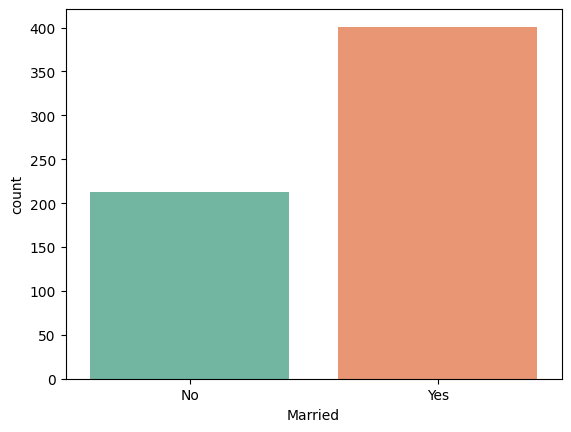

In [182]:
print("Loans taken by Marital Status:")
print(df['Married'].value_counts())
sns.countplot(x='Married', data=df, palette='Set2')

Loans taken by Dependents:
0     360
1     102
2     101
3+     51
Name: Dependents, dtype: int64


<AxesSubplot: xlabel='Dependents', ylabel='count'>

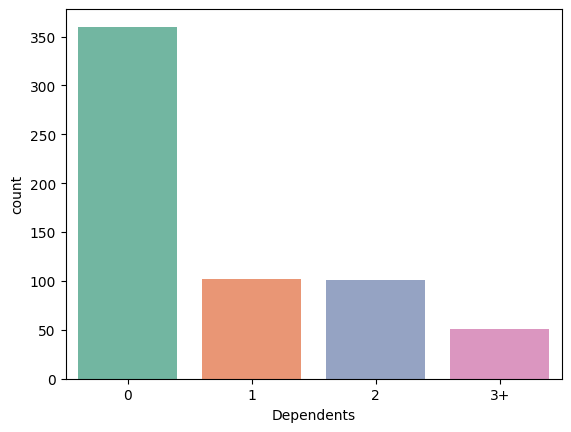

In [183]:
print("Loans taken by Dependents:")
print(df['Dependents'].value_counts())
sns.countplot(x='Dependents', data=df, palette='Set2')

Loans taken by Self Employed:
No     532
Yes     82
Name: Self_Employed, dtype: int64


<AxesSubplot: xlabel='Self_Employed', ylabel='count'>

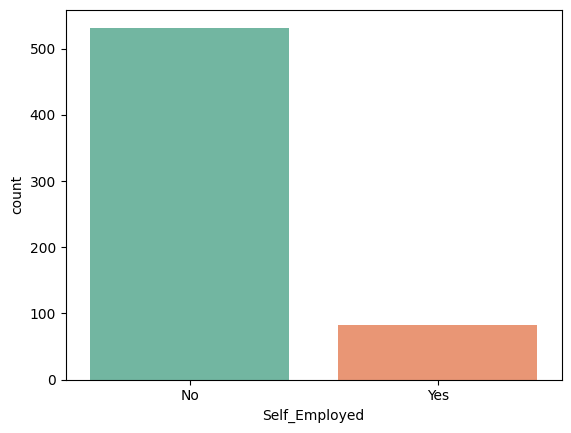

In [184]:
print("Loans taken by Self Employed:")
print(df['Self_Employed'].value_counts())
sns.countplot(x='Self_Employed', data=df, palette='Set2')

Loans taken by Credit History:
1.0    525
0.0     89
Name: Credit_History, dtype: int64


<AxesSubplot: xlabel='Credit_History', ylabel='count'>

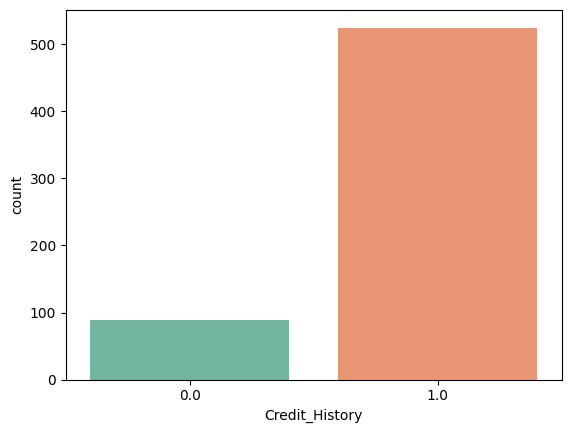

In [185]:
print("Loans taken by Credit History:")
print(df['Credit_History'].value_counts())
sns.countplot(x='Credit_History', data=df, palette='Set2')

Loans taken by Property Area:
Semiurban    233
Urban        202
Rural        179
Name: property_Area, dtype: int64


<AxesSubplot: xlabel='property_Area', ylabel='count'>

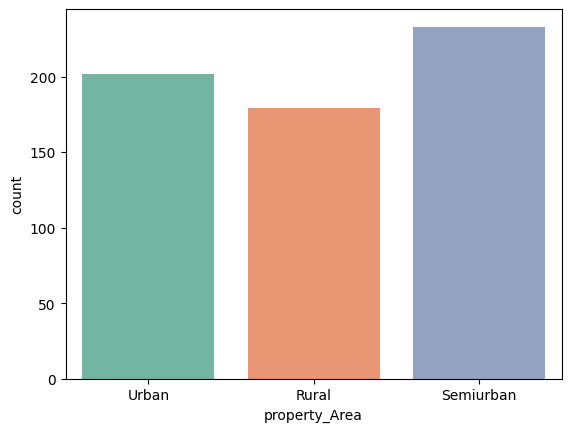

In [186]:
print("Loans taken by Property Area:")
print(df['property_Area'].value_counts())
sns.countplot(x='property_Area', data=df, palette='Set2')

In [187]:
from sklearn.model_selection import train_test_split

In [188]:
# 20% of the data becomes testing data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [189]:
from sklearn.preprocessing import LabelEncoder

In [190]:
x_labelEncoder = LabelEncoder()

In [191]:
# transform all string values to numbers so that they can be dealt with better
for i in range(0,5):
    x_train[:,i] = x_labelEncoder.fit_transform(x_train[:,i])
    x_train[:,7] = x_labelEncoder.fit_transform(x_train[:,7])
    
x_train

array([[1, 1, 0, ..., 1.0, 131.0, 266],
       [1, 0, 1, ..., 1.0, 196.0, 406],
       [1, 1, 0, ..., 0.0, 149.0, 248],
       ...,
       [1, 1, 3, ..., 1.0, 200.0, 362],
       [1, 1, 0, ..., 1.0, 160.0, 272],
       [0, 1, 0, ..., 1.0, 182.0, 300]], dtype=object)

In [192]:
# 1 = Loan Taken, 0 = Loan Not Taken
y_labelEncoder = LabelEncoder()
y_train = y_labelEncoder.fit_transform(y_train)

y_train

array([1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1,

In [201]:
for i in range(0,5):
    x_test[:,i] = x_labelEncoder.fit_transform(x_test[:,i])
    x_test[:,7] = x_labelEncoder.fit_transform(x_test[:,7])
    
x_test
    

array([[ 1.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  5.00000000e+00,  3.86694596e-01,
        -8.11971158e-01,  8.40000000e+01],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  5.00000000e+00,  3.86694596e-01,
        -4.26087833e-01,  2.90000000e+01],
       [ 1.00000000e+00,  1.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  5.00000000e+00,  3.86694596e-01,
         2.49560020e+00,  1.03000000e+02],
       [ 1.00000000e+00,  1.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  5.00000000e+00,  3.86694596e-01,
        -4.53650927e-01,  7.90000000e+01],
       [ 1.00000000e+00,  1.00000000e+00,  2.00000000e+00,
         0.00000000e+00,  5.00000000e+00,  3.86694596e-01,
        -6.32811043e-01,  2.20000000e+01],
       [ 1.00000000e+00,  1.00000000e+00,  0.00000000e+00,
         1.00000000e+00,  3.00000000e+00, -2.58602011e+00,
         3.04334176e-01,  7.00000000e+01],
       [ 1.00000000e+00,  1.000000

In [202]:
y_test = y_labelEncoder.fit_transform(y_test)

y_test

array([1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1], dtype=int64)

In [203]:
# removes the mean and scales each variable to unit variance
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
x_train = ss.fit_transform(x_train)
x_test = ss.fit_transform(x_test)

In [204]:
# begin trying different classifiers to determine their accuracy
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(x_train, y_train)

RandomForestClassifier()

In [205]:
from sklearn import metrics
y_pred = rf.predict(x_test)

print("Random Forest Classifier Accuracy:", metrics.accuracy_score(y_pred, y_test))

y_pred

Random Forest Classifier Accuracy: 0.7642276422764228


array([1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1])

In [206]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(x_train, y_train)

GaussianNB()

In [207]:
y_pred = nb.predict(x_test)
print("Naive Bayes Classifier Accuracy:", metrics.accuracy_score(y_pred, y_test))

y_pred

Naive Bayes Classifier Accuracy: 0.8292682926829268


array([1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1])

In [208]:
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier()
kn.fit(x_train, y_train)

KNeighborsClassifier()

In [209]:
y_pred = kn.predict(x_test)
print("K-Neighbors Classifier Accuracy:", metrics.accuracy_score(y_pred, y_test))

y_pred

K-Neighbors Classifier Accuracy: 0.7886178861788617


array([1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1])

In [210]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)

DecisionTreeClassifier()

In [211]:
y_pred = dt.predict(x_test)
print("Decision Tree Classifier Accuracy:", metrics.accuracy_score(y_pred, y_test))

y_pred

Decision Tree Classifier Accuracy: 0.7398373983739838


array([1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1])

In [212]:
from sklearn.gaussian_process import GaussianProcessClassifier
gp = GaussianProcessClassifier()
gp.fit(x_train, y_train)

GaussianProcessClassifier()

In [213]:
y_pred = gp.predict(x_test)
print("Gaussian Process:", metrics.accuracy_score(y_pred, y_test))

y_pred

Gaussian Process: 0.8048780487804879


array([1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1])

In [214]:
from sklearn.linear_model import LogisticRegression

In [215]:
logReg = LogisticRegression()
logReg.fit(x_train, y_train)

LogisticRegression()

In [216]:
y_pred = logReg.predict(x_test)

In [217]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[14, 19],
       [ 2, 88]], dtype=int64)

In [218]:
print("Logistic Regression Accuracy:", metrics.accuracy_score(y_pred, y_test))

Logistic Regression Accuracy: 0.8292682926829268
